In [ ]:
import os
import numpy as np
from glob import glob
import random
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

path = glob('../nnunet/nnUNet_preprocessed/Dataset003_Liver/nnUNetPlans_2d/*.npz')
npz = np.load(random.choice(path))

In [2]:
files = [os.path.basename(x) for x in list(path)]
trains, tests = train_test_split(files, test_size=0.2, random_state=42)

train_df = pd.DataFrame(trains, columns=['file'])
train_df['fold'] = 'train'
test_df = pd.DataFrame(tests, columns=['file'])
test_df['fold'] = 'test'
df = pd.concat([train_df, test_df], axis=0)
df.head()
df.to_csv('liver_split.csv', index=False)

In [3]:
from dataset import liverDataset
from torch.utils.data import DataLoader
from torchvision import transforms

image_size = 320

transform = transforms.Compose([
    transforms.Resize(image_size, 
                        interpolation=transforms.InterpolationMode.NEAREST_EXACT,
                        antialias=True),
    transforms.RandomCrop(256),
    transforms.RandomHorizontalFlip(),
    transforms.Lambda(lambda x: torch.flip(x, [1])),
    # transforms.Lambda(lambda x: x.repeat(3, 1, 1) ),
    # transforms.ToTensor()
])

train_dataset = liverDataset(path='../nnunet/nnUNet_preprocessed/Dataset003_Liver/nnUNetPlans_2d/', 
                             csv_file='liver_split.csv',
                             fold='train', 
                             transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)

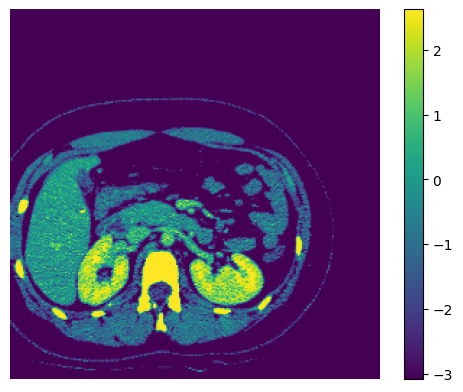

(torch.Size([4, 3, 256, 256]), torch.Size([4, 3, 256, 256]))

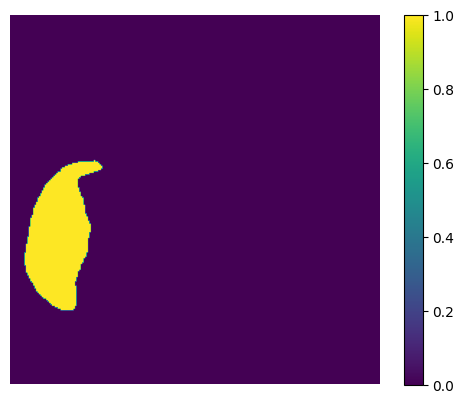

In [4]:
len(train_loader)
data = next(iter(train_loader))
_ = plt.imshow(data['img'][0, 0, :, :])
_ = plt.colorbar()
_ = plt.axis('off')
_ = plt.show()
_ = plt.imshow(data['label'][0, 0, :, :])
_ = plt.colorbar()
_ = plt.axis('off')
data['img'].shape, data['label'].shape